In [1]:

import numpy as np
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/optimization of supply chain and inventory management1.csv')

In [3]:
df = pd.DataFrame(data)
print(df)

          Date  Product ID  quantity sold  Selling Price  store id  \
0    8/15/2022        1001              5          25.99      1001   
1    8/16/2022        1002              3          39.99      1002   
2    8/17/2022        1003              4          14.99      1003   
3    8/18/2022        1004              2          59.99      1004   
4    8/19/2022        1005              6          19.99      1005   
5    8/20/2022        1006              7          24.99      1006   
6    8/21/2022        1007              3          49.99      1007   
7    8/22/2022        1008              5          29.99      1008   
8    8/23/2022        1009              4          34.99      1009   
9    9/15/2022        1001              5          12.99      1001   
10   9/16/2022        1002              3          24.99      1002   
11   9/17/2022        1003              7           9.99      1003   
12   9/18/2022        1004              4          19.99      1004   
13   9/20/2022      

In [4]:
df1=df.set_index('Product ID', inplace=True)
print(df1)


None


In [5]:
df.fillna(method='ffill', inplace=True)

<ipython-input-5-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


EXPLORATORY DATA ANALYSIS

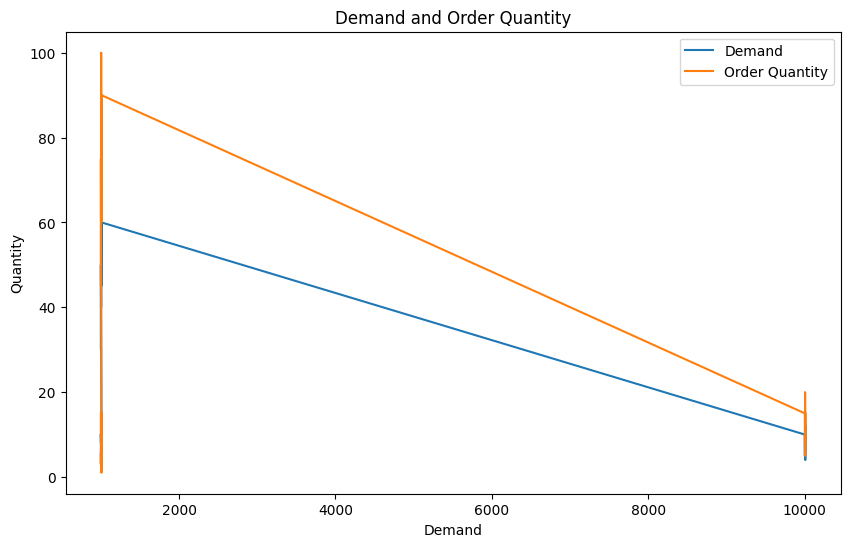

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize demand and supply over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Demand'], label='Demand')
plt.plot(df.index, df['Order Quantity'], label='Order Quantity')
plt.xlabel('Demand')
plt.ylabel('Quantity')
plt.title('Demand and Order Quantity')
plt.legend()
plt.show()

CORRELATION MATRIX

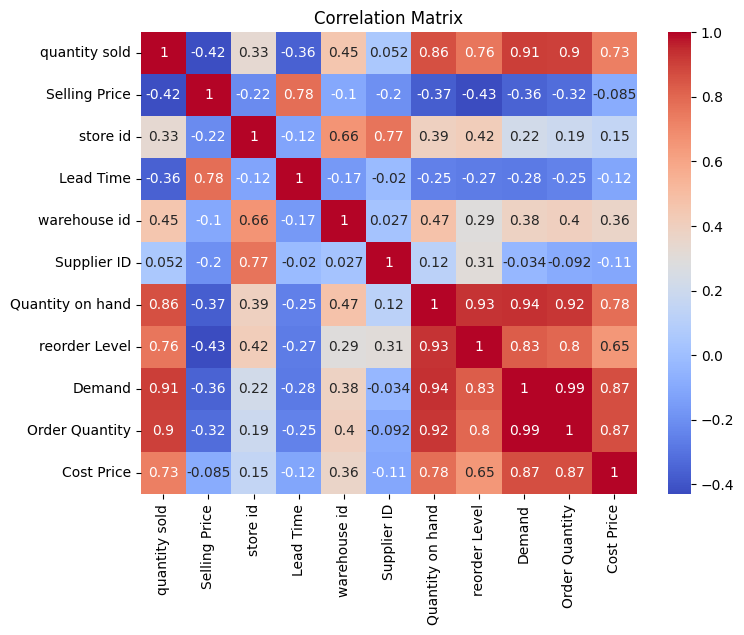

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

DEMAND FORECASTING

Mean Squared Error: 0.8730562774609525


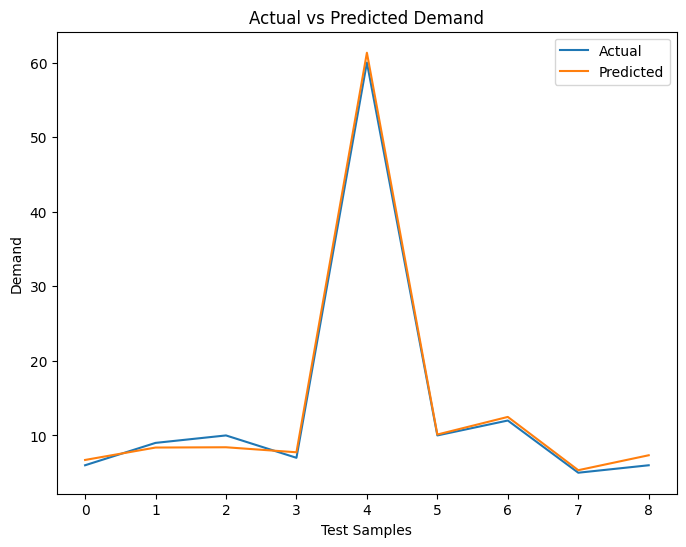

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for forecasting
X = df[['Order Quantity', 'Lead Time', 'Selling Price']].values
y = df['Demand'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Test Samples')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand')
plt.legend()
plt.show()


INVENTORY OPTIMIZATION

Optimization Successful!
Optimal Supply: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Total Cost: 0.0


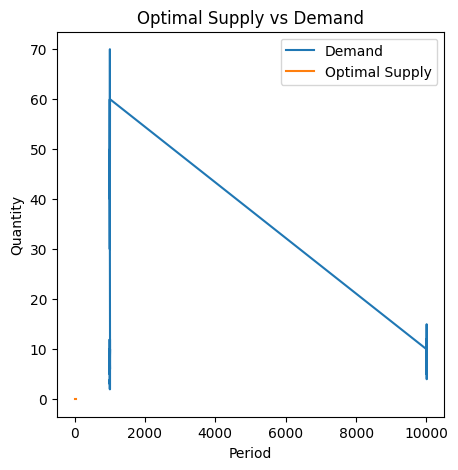

In [9]:
from scipy.optimize import linprog

# Define the optimization problem
c = df['Selling Price'].values  # Cost coefficients
A = np.identity(len(df))  # Constraints coefficients (identity matrix for simplicity)
b = df['Demand'].values  # Demand values as constraints

# Solve the optimization problem
result = linprog(c, A_ub=A, b_ub=b, method='highs')

# Check results
if result.success:
    print("Optimization Successful!")
    print("Optimal Supply:", result.x)
    print("Total Cost:", result.fun)
else:
    print("Optimization Failed!")

# Visualize the results
plt.figure(figsize=(5,5))
plt.plot(df['Demand'], label='Demand')
plt.plot(result.x, label='Optimal Supply')
plt.xlabel('Period')
plt.ylabel('Quantity')
plt.title('Optimal Supply vs Demand')
plt.legend()
plt.show()


PERFORMANCE EVALUTION:

Service Level: 0.00%
Cost Savings: 653240.35


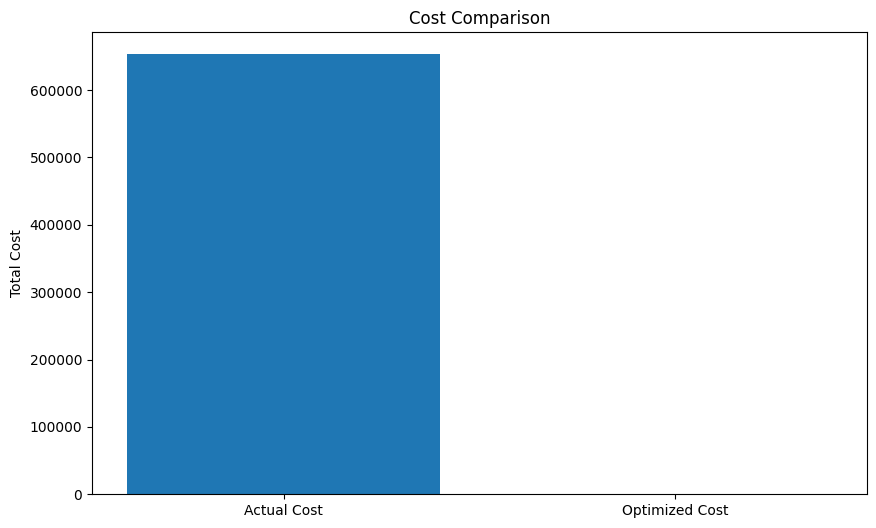

In [10]:
# Compare optimized supply levels with actual supply
optimized_supply = result.x
actual_supply = df['Order Quantity'].values

# Calculate service level
service_level = np.mean(optimized_supply >= df['Demand'].values)
print(f'Service Level: {service_level * 100:.2f}%')

# Calculate cost savings
cost_savings = np.sum(actual_supply * df['Cost Price'].values) - result.fun
print(f'Cost Savings: {cost_savings}')

# Visualize cost comparison
plt.figure(figsize=(10, 6))
plt.bar(['Actual Cost', 'Optimized Cost'], [np.sum(actual_supply * df['Cost Price'].values), result.fun])
plt.ylabel('Total Cost')
plt.title('Cost Comparison')
plt.show()


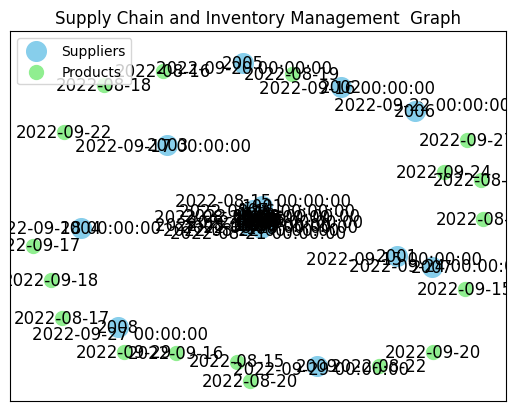

In [16]:
import pandas as pd
import networkx as nx  # Import networkx for graph creation
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes for suppliers
suppliers = df['Supplier ID'].unique()
G.add_nodes_from(suppliers, bipartite=0)

# Add nodes for products (dates in this case)
products = df['Date'].astype(str).tolist()
G.add_nodes_from(products, bipartite=1)

# Add edges based on supply and demand
for index, row in df.iterrows():
    G.add_edge(row['Supplier ID'], str(row['Date']), weight=row['Order Quantity'])

# Plot the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Separate the nodes by category for color coding
supplier_nodes = [node for node in G.nodes() if node in suppliers]
product_nodes = [node for node in G.nodes() if node in products]

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=supplier_nodes, node_color='skyblue', node_size=200,label='Suppliers')
nx.draw_networkx_nodes(G, pos, nodelist=product_nodes, node_color='lightgreen', node_size=100, label='Products')

# Draw edges with weights
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1.0, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})

# Draw labels
nx.draw_networkx_labels(G, pos)

# Title and legend
plt.title("Supply Chain and Inventory Management  Graph")
plt.legend(loc='upper left')
plt.show()